In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import shin_metiu_full as sf
import matplotlib as mpl

# import ipywidgets as widgets
import pandas as pd
import seaborn as sns

from ansatze import hweff_ansatz
from qiskit import Aer
from exact_simulator import prep_ham, simulation, inner
from helpers import read_files

from auto_plotter import autoplotter, prep_dfs
import warnings

mpl.rcParams['text.usetex'] = True

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")
sns.set_context(
    "talk",
    rc={
        "text.usetex": True,
        "font.size": 18,
        "axes.titlesize": 18,
        "axes.labelsize": 18,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "legend.fontsize": 16,
        "legend.loc": "lower left",
        "legend.frameon": False,
        "font.family": "serif",
        "font.serif": "Times New Roman",
    },
)

backend = Aer.get_backend("statevector_simulator")
name1, name2 = 'Single', 'MD'

# df1,df_coef1=read_files(100,1000,'results_helix/new/param/single_',ending='.json')
# df2,df_coef2=read_files(100,1000,'results_helix/new/shot_100/single_',ending='.json')
# df3,df_coef3=read_files(100,1000,'results_helix/new/shot_1000/single_',ending='.json')
# df4,df_coef4=read_files(100,1000,'results_helix/new/shot_10000/single_',ending='.json')
# df5,df_coef5=read_files(100,400,'results_helix/new/shot_100000/single_',ending='.jsonchk')


# udf1,udf_coef1=read_files(100,1000,'results_helix/new/unparam/single_',ending='.json')
# udf2,udf_coef2=read_files(100,1000,'results_helix/new/unparam_shot_100/single_',ending='.json')
# udf3,udf_coef3=read_files(100,1000,'results_helix/new/unparam_shot_1000/single_',ending='.json')
# udf4,udf_coef4=read_files(100,1000,'results_helix/new/unparam_shot_10000/single_',ending='.json')
# udf5,udf_coef5=read_files(100,400,'results_helix/new/unparam_shot_100000/single_',ending='.jsonchk')


# mdf1,mdf_coef1=read_files(100,1000,'results_helix/new/md/md_',ending='.json')
# mdf2,mdf_coef2=read_files(100,1000,'results_helix/new/md100/md_',ending='.json')
# mdf3,mdf_coef3=read_files(100,1000,'results_helix/new/md1000/md_',ending='.json')
# mdf4,mdf_coef4=read_files(100,1000,'results_helix/new/md10000/md_',ending='.json')
# mdf5,mdf_coef5=read_files(100,400,'results_helix/new/md100000/md_',ending='.jsonchk')
dfs = pd.read_feather('results_helix/normal_df.ft')
# dfscoef = pd.read_feather('results_helix/coef_df.ft')

/home/danielb/miniconda3/envs/qiskit/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# df1['shots'] = 0
# df2['shots'] = 100
# df3['shots'] = 1000
# df4['shots'] = 10000
# df5['shots'] = 100005
# df_coef1['shots'] = 0
# df_coef2['shots'] = 100
# df_coef3['shots'] = 1000
# df_coef4['shots'] = 10000
# df_coef5['shots'] = 100000
# df1['parameterized'] ='yes'
# df2['parameterized'] ='yes'
# df3['parameterized'] ='yes'
# df4['parameterized'] ='yes'
# df5['parameterized'] ='yes'
# df_coef1['parameterized'] ='yes'
# df_coef2['parameterized'] ='yes'
# df_coef3['parameterized'] ='yes'
# df_coef4['parameterized'] ='yes'
# df_coef5['parameterized'] ='yes'
# df1['simulation'] ='single'
# df2['simulation'] ='single'
# df3['simulation'] ='single'
# df4['simulation'] ='single'
# df5['simulation'] ='single'
# df_coef1['simulation'] ='single'
# df_coef2['simulation'] ='single'
# df_coef3['simulation'] ='single'
# df_coef4['simulation'] ='single'
# df_coef5['simulation'] ='single'


# udf1['shots'] = 0
# udf2['shots'] = 100
# udf3['shots'] = 1000
# udf4['shots'] = 10000
# udf5['shots'] = 100000
# udf_coef1['shots'] = 0
# udf_coef2['shots'] = 100
# udf_coef3['shots'] = 1000
# udf_coef4['shots'] = 10000
# udf_coef5['shots'] = 100000
# udf1['parameterized'] = 'no'
# udf2['parameterized'] = 'no'
# udf3['parameterized'] = 'no'
# udf4['parameterized'] = 'no'
# udf5['parameterized'] = 'no'
# udf_coef1['parameterized'] = 'no'
# udf_coef2['parameterized'] = 'no'
# udf_coef3['parameterized'] = 'no'
# udf_coef4['parameterized'] = 'no'
# udf_coef5['parameterized'] = 'no'
# udf1['simulation'] ='single'
# udf2['simulation'] ='single'
# udf3['simulation'] ='single'
# udf4['simulation'] ='single'
# udf5['simulation'] ='single'
# udf_coef1['simulation'] ='single'
# udf_coef2['simulation'] ='single'
# udf_coef3['simulation'] ='single'
# udf_coef4['simulation'] ='single'
# udf_coef5['simulation'] ='single'

# mdf1['shots'] = 0
# mdf2['shots'] = 100
# mdf3['shots'] = 1000
# mdf4['shots'] = 10000
# mdf5['shots'] = 10000
# mdf1['parameterized'] ='no'
# mdf2['parameterized'] ='no'
# mdf3['parameterized'] ='no'
# mdf4['parameterized'] ='no'
# mdf5['parameterized'] ='no'
# mdf_coef1['shots'] = 0
# mdf_coef2['shots'] = 100
# mdf_coef3['shots'] = 1000
# mdf_coef4['shots'] = 10000
# mdf_coef5['shots'] = 100000
# mdf_coef1['parameterized'] ='no'
# mdf_coef2['parameterized'] ='no'
# mdf_coef3['parameterized'] ='no'
# mdf_coef4['parameterized'] ='no'
# mdf_coef5['parameterized'] ='no'
# mdf1['simulation'] ='MD'
# mdf2['simulation'] ='MD'
# mdf3['simulation'] ='MD'
# mdf4['simulation'] ='MD'
# mdf5['simulation'] ='MD'
# mdf_coef1['simulation'] ='MD'
# mdf_coef2['simulation'] ='MD'
# mdf_coef3['simulation'] ='MD'
# mdf_coef4['simulation'] ='MD'
# mdf_coef5['simulation'] ='MD'

# dfs = pd.concat([df1,df2,df3,df4,df5,udf1,udf2,udf3,udf4,udf5,mdf1,mdf2,mdf3,mdf4,mdf5])
# dfscoef = pd.concat([df_coef1,df_coef2,df_coef3,df_coef4,df_coef5,udf_coef1,udf_coef2,udf_coef3,udf_coef4,udf_coef5
#                      ,mdf_coef1,mdf_coef2,mdf_coef3,mdf_coef4,mdf_coef5])

In [3]:
mpl.rcParams['text.usetex'] = False
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 


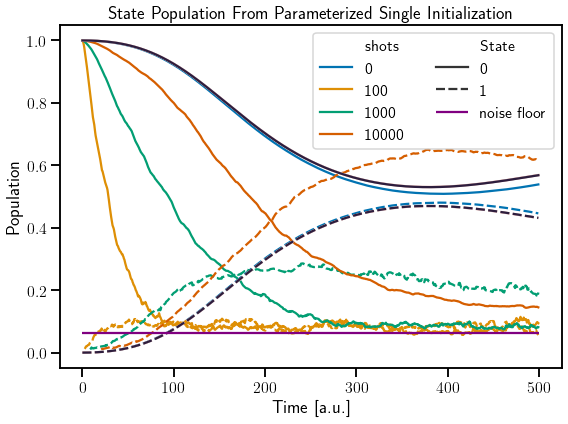

In [5]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-2&Type=="TDVQP" & parameterized=="yes"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-6 &Type=="Exact" & parameterized=="yes"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,legend=None,alpha=1)
plt.xlabel(r'Time [a.u.]')
# plt.ylim([1e-6,2])
# plt.yscale('log')
plt.title(r'State Population From Parameterized Single Initialization')
plt.hlines(0.0625,0,500,colors='purple',label='noise floor')
handles, labels = plt.gca().get_legend_handles_labels()
# Create legend
plt.legend(handles=handles, labels=labels, ncol=2)

plt.tight_layout()
# plt.savefig('./custom_plots/single_populations.pdf')

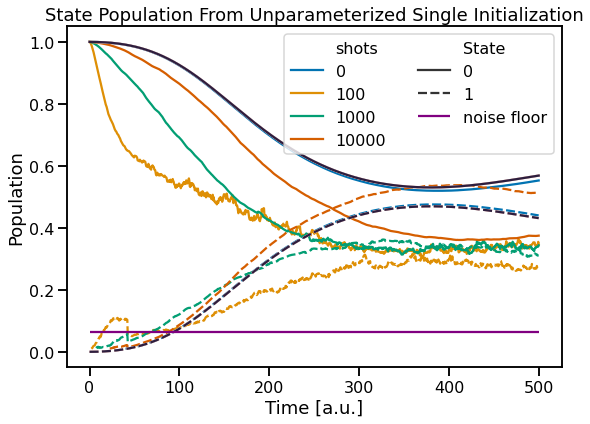

In [58]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-2&Type=="TDVQP" & parameterized=="no"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,palette=sns.color_palette("colorblind"))
sns.lineplot(data=dfscoef.query('State<2 & Population>1e-6 &Type=="Exact" & parameterized=="no"'),x='Time',y='Population',hue='shots',style='State',ci=None,ax=ax,legend=None,alpha=1)
plt.xlabel(r'Time [a.u.]')
# plt.ylim([1e-6,2])
# plt.yscale('log')
plt.title(r'State Population From Unparameterized Single Initialization')
plt.hlines(0.0625,0,500,colors='purple',label='noise floor')
handles, labels = plt.gca().get_legend_handles_labels()

# Create legend
plt.legend(handles=handles, labels=labels, ncol=2)

plt.tight_layout()
# plt.savefig('./custom_plots/single_populations.pdf')

In [21]:
time = np.array(list(range(1000)))+1
fids = []
tresh = [0.99999,0.985,0.997,0.9991,0.99994]
for i in tresh:
    fids.append(i**time)
fids = np.array(fids).T
tresh = ['0.99999','0.985','0.997','0.999','0.99995']
# tresh = ['$1$','$1-10^{-5}$','$1-10^{-4}$','$1-10^{-3}$','$1-10^{-2}$']
df = pd.DataFrame(data = fids,columns=tresh)
df  = df.reset_index()
df  = df.rename(columns={'index':'timestep'})
df = df.melt(id_vars='timestep')
df['time'] = 0.5*df['timestep']
df  = df.rename(columns={'value':'fidelity','variable':'treshhold'})


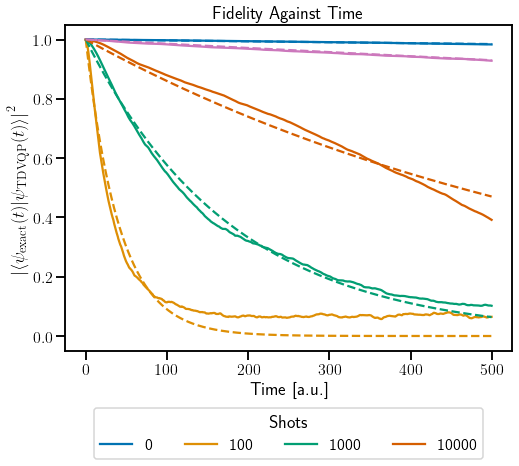

In [65]:
fig, ax = plt.subplots(nrows=1,figsize=((8, 6)))

sns.lineplot(data=dfs.query("parameterized=='no'"), x="times", y="fidelity_to_exact", ci=None, ax=ax, palette="colorblind",hue='shots')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
ax.set_title('Fidelity Against Time')
sns.lineplot(data=dfs,x='times',y='fitted',ci=None,palette="colorblind",ax=ax,hue='shots',linestyle='--')
# plt.hlines(1/16,0,500)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[0:4], labels=labels[0:4], ncol=4,bbox_to_anchor=(0.5, -0.15), loc='upper center',title='Shots')


In [64]:
dfs.keys()

Index(['index', 'fidelity_to_ideal', 'fidelity_to_exact', 'ideal_forces_el',
       'ideal_forces_nuc', 'ideal_tot_forces', 'ideal_velocities',
       'ideal_positions', 'ideal_energy_el', 'ideal_energy_Tnuc',
       'ideal_energy_Vnuc', 'exact_forces_el', 'exact_forces_nuc',
       'exact_tot_forces', 'exact_velocities', 'exact_positions',
       'exact_energy_el', 'exact_energy_Tnuc', 'exact_energy_Vnuc',
       'QC_forces_el', 'QC_forces_nuc', 'QC_tot_forces', 'QC_velocities',
       'QC_positions', 'QC_energy_el', 'QC_energy_Tnuc', 'QC_energy_Vnuc',
       'force', 'err_force', 'energy', 'err_energy', 'init_F', 'final_F',
       'err_init_F', 'err_fin_F', 'iter_number', 'times', 'sample',
       'diff_ideal_exact', 'ideal_energy', 'QC_energy', 'QC_energy_rel',
       'exact_energy', 'exact_energy_rel', 'ideal_energy_rel', 'shots',
       'parameterized', 'simulation', 'fitted', 'threshold'],
      dtype='object')

In [43]:
import pandas as pd
from scipy.optimize import curve_fit

def custom_func(x, a):
    return a ** x 

grouped = dfs.groupby(['shots'])

for name, group in grouped:
    popt, _ = curve_fit(custom_func, group['times'], group['fidelity_to_exact'])
    dfs.loc[dfs['shots'] == name, 'fitted'] = custom_func(dfs.loc[dfs['shots'] == name, 'times'], *popt)
    dfs.loc[dfs['shots'] == name, 'threshold'] = popt[0]




In [32]:
dfs

,index,fidelity_to_ideal,fidelity_to_exact,ideal_forces_el,ideal_forces_nuc,ideal_tot_forces,ideal_velocities,ideal_positions,ideal_energy_el,ideal_energy_Tnuc,...,QC_energy,QC_energy_rel,exact_energy,exact_energy_rel,ideal_energy_rel,shots,parameterized,simulation,fitted,threshold
0,0,0.999950,1.000000,-4.188422e-06,0.000006,0.000001,0.001140,-2.000000,-0.448958,0.001193,...,-0.227458,0.000017,-0.227458,0.000017,0.000000e+00,0,yes,single,1.000000,0.997619
1,1,0.999949,0.999998,-4.188741e-06,0.000006,0.000001,0.001141,-1.999430,-0.448954,0.001194,...,-0.227458,0.000017,-0.227458,0.000017,-3.124723e-13,0,yes,single,0.998809,0.997619
2,2,0.999948,0.999992,-4.189059e-06,0.000006,0.000001,0.001141,-1.998859,-0.448949,0.001196,...,-0.227457,0.000018,-0.227458,0.000017,-3.571310e-13,0,yes,single,0.997619,0.997619
3,3,0.999946,0.999983,-4.189376e-06,0.000006,0.000001,0.001142,-1.998288,-0.448945,0.001197,...,-0.227451,0.000024,-0.227458,0.000017,2.676470e-13,0,yes,single,0.996431,0.997619
4,4,0.999943,0.999972,-4.189692e-06,0.000006,0.000001,0.001143,-1.997717,-0.448941,0.001199,...,-0.227451,0.000025,-0.227458,0.000017,1.829037e-12,0,yes,single,0.995244,0.997619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251995,9995,0.901892,0.902057,4.031744e-07,0.000004,0.000005,0.001542,-1.537011,-0.446749,0.002184,...,-0.217282,0.011098,-0.228376,0.000004,-1.005755e-03,100000,no,MD,0.305475,0.997619
1251996,9996,0.901456,0.901626,4.145717e-07,0.000004,0.000005,0.001545,-1.536239,-0.446749,0.002190,...,-0.217269,0.011111,-0.228376,0.000004,-1.005747e-03,100000,no,MD,0.305111,0.997619
1251997,9997,0.901102,0.901272,4.259679e-07,0.000004,0.000005,0.001547,-1.535467,-0.446750,0.002196,...,-0.217218,0.011162,-0.228376,0.000004,-1.005739e-03,100000,no,MD,0.304747,0.997619
1251998,9998,0.900926,0.901094,4.373630e-07,0.000004,0.000005,0.001549,-1.534693,-0.446751,0.002203,...,-0.217224,0.011156,-0.228376,0.000004,-1.005731e-03,100000,no,MD,0.304384,0.997619


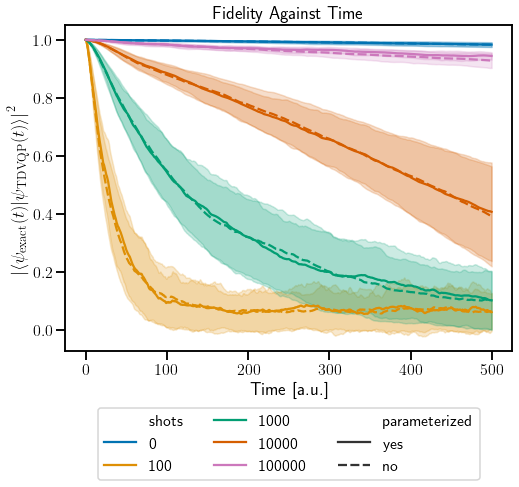

In [6]:
fig, ax = plt.subplots(nrows=1,figsize=((8, 6)))

sns.lineplot(data=dfs, x="times", y="fidelity_to_exact", ci='sd', ax=ax, palette="colorblind",hue='shots',style='parameterized')
ax.set(ylabel=r'$\left |\langle\psi_\mathrm{exact}(t)|\psi_\mathrm{TDVQP}(t)\rangle\right |^2 $',xlabel= r'Time [a.u.]')
ax.set_title('Fidelity Against Time')

handles, labels = plt.gca().get_legend_handles_labels()

# Create legend
plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')



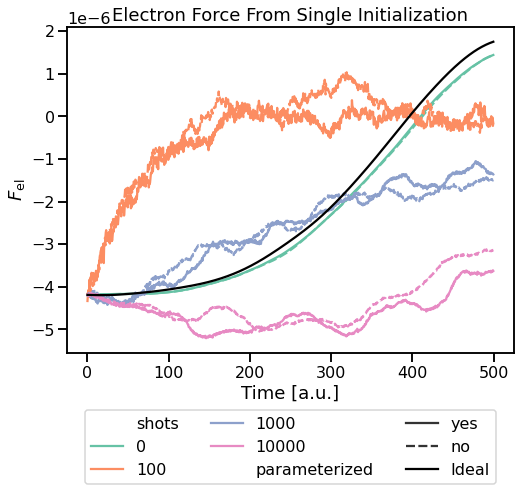

In [28]:
fig, ax = plt.subplots(figsize=((8, 6)))
# sns.lineplot(data=sdf, x="times", y="QC_forces_el", ax=ax, units="sample", estimator=None, alpha=0.05,label=None)
# plt.legend('')
sns.lineplot(data=dfs, x="times", y="QC_forces_el", ci=None, ax=ax, palette="Set2",style="parameterized",hue='shots')
sns.lineplot(data=df1, x="times", y="exact_forces_el", ci=None, ax=ax,color='black', label='Ideal')
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend([handles[i] for i in [0,1,3]], [labels[i] for i in [0,1,3]])

ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force From Single Initialization')
# plt.savefig("custom_plots/S_force_long.pdf")
handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


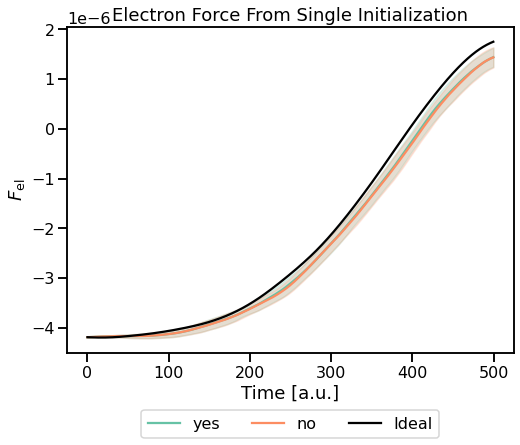

In [42]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfs.query('shots==0'), x="times", y="QC_forces_el", ci='sd', ax=ax, palette="Set2",hue="parameterized")
sns.lineplot(data=df1, x="times", y="exact_forces_el", ci=None, ax=ax,color='black', label='Ideal')
ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force From Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


ValueError: Could not interpret value `Type` for parameter `style`

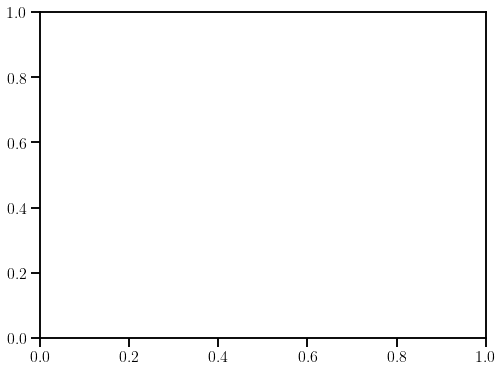

In [14]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfs.query('shots==0'), x="times", y="QC_velocities", ci='sd', ax=ax, palette="Set2",hue="parameterized",style='Type')
sns.lineplot(data=dfs, x="times", y="exact_velocities", ci=None, ax=ax,color='black', label='Ideal')
ax.set(ylabel='Velocity',xlabel= r'Time [a.u.]',title='Proton Velocity From Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


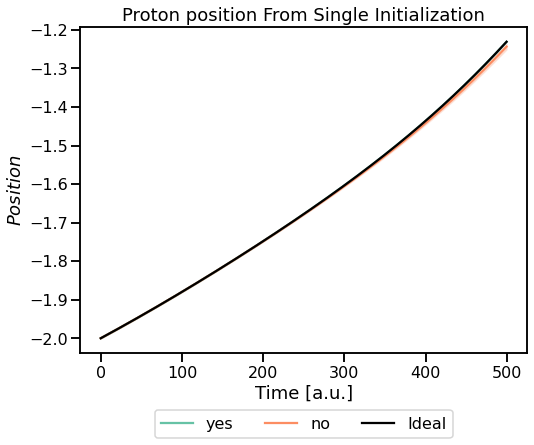

In [40]:
fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=dfs.query('shots==0'), x="times", y="QC_positions", ci='sd', ax=ax, palette="Set2",hue="parameterized")
sns.lineplot(data=df1, x="times", y="exact_positions", ci=None, ax=ax,color='black', label='Ideal')
ax.set(ylabel='$Position$',xlabel= r'Time [a.u.]',title='Proton position From Single Initialization')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, ncol=3,bbox_to_anchor=(0.5, -0.15), loc='upper center')


[Text(0, 0.5, '$F_\\mathrm{el}$'),
 Text(0.5, 0, 'Time [a.u.]'),
 Text(0.5, 1.0, 'Electron Force From Single Initialization')]

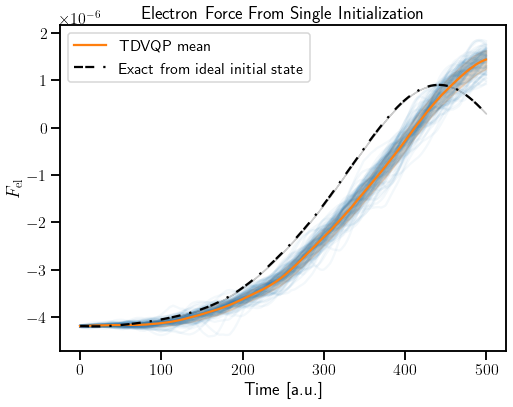

In [38]:

fig, ax = plt.subplots(figsize=((8, 6)))
sns.lineplot(data=df1, x="times", y="QC_forces_el", ax=ax, units="sample", estimator=None, alpha=0.05,label=None)
sns.lineplot(data=df1, x="times", y="QC_forces_el", errorbar=("sd",1), estimator=np.mean, ax=ax, alpha=1, label = 'TDVQP mean')
sns.lineplot(data=df1, x="times", y="ideal_forces_el", errorbar="sd", ax=ax,color='black', label='Exact from ideal initial state',style='err_energy', dashes=[(4,1,4)])
handles, labels = ax.get_legend_handles_labels()

l = plt.legend([handles[i] for i in [0,1]], [labels[i] for i in [0,1]])
ax.set(ylabel='$F_\mathrm{el}$',xlabel= r'Time [a.u.]',title='Electron Force From Single Initialization')
# plt.savefig("custom_plots/S_force_long.pdf")

In [ ]:
fig, ax = plt.subplots(figsize=((8, 6)))
# sns.lineplot(data=df, y="iter_number", x="times", ax=ax, errorbar=(lambda x: (np.percentile(x, 25), np.percentile(x, 75))))

# sns.lineplot(data=df1, x="times", y="final_F", ax=ax, units="sample", estimator=None,alpha=0.05,label='unparam')
# sns.lineplot(data=df2, x="times", y="final_F", ax=ax, units="sample", estimator=None,alpha=0.05,label=parameterized)
sns.lineplot(data=dfs, x="times", y="final_F", ax=ax, ci=None,  estimator=np.mean, hue='shots',style='parameterized')
# sns.lineplot(data=df2, x="times", y="final_F", ax=ax,  estimator=np.mean,label=parameterized)

# ax.get_legend().remove()

plt.yscale('log')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=((10, 10)))

df['diff_pos'] = (df['QC_positions']-df["ideal_positions"])**2
sns.lineplot(
    data=df, x="times", y="diff_pos", errorbar=(lambda x: (np.percentile(x, 25), np.percentile(x, 75))), estimator=np.mean, ax=ax, alpha=1, label = 'QC mean'
)

ax.set_ylabel('RMS Difference in nuclear Position')
plt.show()

In [1]:
fig, ax = plt.subplots(figsize=((10, 10)))
sns.histplot(data=dfs.query('times==0'), x="QC_velocities",ax=ax)
sns.histplot(data=dfs.query('times==10'), x="ideal_velocities",ax=ax)

NameError: name 'plt' is not defined

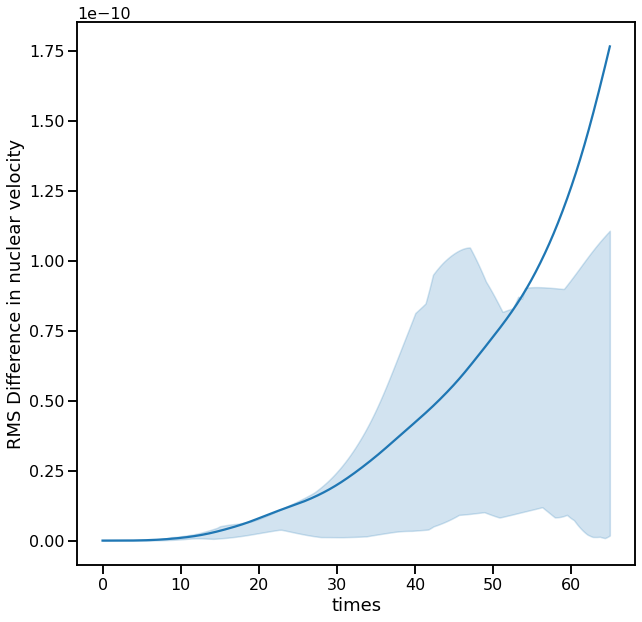

In [10]:
fig, ax = plt.subplots(figsize=((10, 10)))

df['diff_vel'] = (df['QC_velocities']-df["ideal_velocities"])**2
sns.lineplot(
    data=df, x="times", y="diff_vel", errorbar=(lambda x: (np.percentile(x, 25), np.percentile(x, 75))), estimator=np.mean, ax=ax, alpha=1, #label = 'QC mean'
)

ax.set_ylabel('RMS Difference in nuclear velocity')
plt.show()

In [ ]:
def plot(p,y,sc0,sc1):
    fig = plt.figure()
    gs = fig.add_gridspec(2, hspace=0.1, height_ratios=[2, 1])
    axs = gs.subplots(sharex=True)
    fig.suptitle(p)
    df[f'diff_{p}']=np.sqrt((df[f"exact_{p}"] - df[f"QC_{p}"])**2)
    sns.lineplot(ax=axs[1],data=df,x=f'times',y=f'diff_{p}',legend=None)
    sns.lineplot(ax=axs[0],
        data=df,y=f"exact_{p}",x='times',
        color="black",
        label="Exact",
    )
    sns.lineplot(ax=axs[0],
        data=df,y=f"QC_{p}",x='times',
        color="red",
        label="TDVQP",
    )
    axs[1].set_ylabel(f'RMSD ${sc1}$')
    axs[0].set_ylabel(f'{y} [a.u.] ${sc0}$')
    axs[0].set_xlabel('Time [a.u.]')
    axs[1].set_xlabel('Time [a.u.]')

    axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    # axs[0].set_yscale('log')
    # axs[0].legend()
    # axs[1].legend(loc=4)
    # axs[0].set_yscale('log')
    # axs[1].set_yscale("log")
    plt.tight_layout()
    plt.show()
    
plot("velocities",'Velocity','\\cdot10^{-1}','\\cdot10^{-5}')

In [ ]:
plot("positions",'Position','\\cdot10^{0}','\\cdot10^{-5}')

In [ ]:
plot("positions",'Position','\\cdot10^{sc1}','\\cdot10^{-4}')